In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#Reading the data
csv_path = "Desktop/UVA/Fall/Data_Mining/Assignment/Final Project/data/audio_features.csv"
songs = pd.read_csv(csv_path)
songs.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,...,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1,Tag2
0,0,0,0.0,22050,f020e81a680b9f8f022007c06df6a2a9,0.0,354.48118,2.090,0.0,0,...,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal,NaN
1,1,1,0.0,22050,6dd67592ca97754d3c7f611fa225d202,0.0,149.94240,0.125,0.0,0,...,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae,NaN
2,2,4,0.0,22050,f886f26f3f4787684fd15eb2150c65a6,0.0,241.76281,1.013,0.0,0,...,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock,NaN
3,3,6,0.0,22050,08bf9981b69f71d49d652f6eb8c94666,0.0,112.19546,0.252,0.0,0,...,-3.045799,17.650575,-27.175406,8.789328,-45.780026,-3.505494,-5.354578,4.324896,Jazz,NaN
4,4,7,0.0,22050,0ab0596732b010e0bac3a93c7a38a8bc,0.0,201.97832,0.000,0.0,0,...,10.614442,30.102780,-23.520671,3.203586,14.813826,10.853765,-8.715453,15.808810,Folk,NaN


In [45]:
df_m = songs
songs.shape

(17788, 82)

In [46]:
df_m.iloc[1,:]

Unnamed: 0                                                       1
Unnamed: 0.1                                                     1
Unnamed: 1                                                       0
analysis_sample_rate                                         22050
audio_md5                         6dd67592ca97754d3c7f611fa225d202
danceability                                                     0
duration                                                   149.942
end_of_fade_in                                               0.125
energy                                                           0
idx_bars_confidence                                              0
idx_bars_start                                                   0
idx_beats_confidence                                             0
idx_beats_start                                                  0
idx_sections_confidence                                          0
idx_sections_start                                            

There are several categoricals that should be removed as they are not appropriate for the analysis we want to calculate. For example, track names, artist name and album name are all unuseful. Additionally, everything with an
idx label can be dropped as the data is incomplete. Finally, any value that does not change can be removed.

In [47]:
df_m.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 1','genre', 'artist_mbid', 'artist_name','release', 'release_7digitalid', 'audio_md5',
                     'song_id', 'title', 'track_7digitalid', 'Tag2', 'artist_id', 'artist_7digitalid', 'artist_playmeid'], inplace = True)

In [48]:
cols = [c for c in df_m.columns if c[0:3] != 'idx']
df_m=df_m[cols]
df_m.head()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,22050,0.0,354.48118,2.090,0.0,9,0.721,-8.413,1,0.628,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,22050,0.0,149.94240,0.125,0.0,8,0.743,-9.047,1,0.572,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,22050,0.0,241.76281,1.013,0.0,9,0.000,-4.265,1,0.280,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock
3,22050,0.0,112.19546,0.252,0.0,5,0.000,-19.536,1,0.000,...,-20.474935,-3.045799,17.650575,-27.175406,8.789328,-45.780026,-3.505494,-5.354578,4.324896,Jazz
4,22050,0.0,201.97832,0.000,0.0,0,0.178,-14.918,1,0.527,...,-8.034986,10.614442,30.102780,-23.520671,3.203586,14.813826,10.853765,-8.715453,15.808810,Folk


In [49]:
cols = [c for c in df_m.columns if df_m[c].nunique() >1]
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock
3,112.19546,0.252,5,0.000,-19.536,1,0.000,102.957,123.014,4,...,-20.474935,-3.045799,17.650575,-27.175406,8.789328,-45.780026,-3.505494,-5.354578,4.324896,Jazz
4,201.97832,0.000,0,0.178,-14.918,1,0.527,196.023,142.425,1,...,-8.034986,10.614442,30.102780,-23.520671,3.203586,14.813826,10.853765,-8.715453,15.808810,Folk


In [50]:
df_m.shape

(17788, 44)

The artist features should also be dropped. The analysis here is using song information.

In [51]:
cols = [c for c in df_m.columns if c[0:6] != 'artist']
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock
3,112.19546,0.252,5,0.000,-19.536,1,0.000,102.957,123.014,4,...,-20.474935,-3.045799,17.650575,-27.175406,8.789328,-45.780026,-3.505494,-5.354578,4.324896,Jazz
4,201.97832,0.000,0,0.178,-14.918,1,0.527,196.023,142.425,1,...,-8.034986,10.614442,30.102780,-23.520671,3.203586,14.813826,10.853765,-8.715453,15.808810,Folk


Finally. While they aren't necessarily out of the scope of the analysis. Given that this objective is meant to be used as a tool to predict new songs it seems the information provided cannot be used so they will be dropped

In [52]:
df_m.drop(columns = ['song_hotttnesss', 'year'], inplace = True)

In [53]:
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,...,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,timbre_11,Tag1
0,354.48118,2.090,9,0.721,-8.413,1,0.628,344.108,154.238,4,...,-12.591367,-44.293892,-9.339179,1.056260,-5.776037,-0.371761,1.495389,-3.848946,3.408958,Metal
1,149.94240,0.125,8,0.743,-9.047,1,0.572,142.861,158.292,4,...,22.914455,-17.480633,17.263987,-17.580544,-17.936875,8.633928,-13.547967,6.287460,11.251171,Reggae
2,241.76281,1.013,9,0.000,-4.265,1,0.280,228.223,90.206,4,...,-2.802598,9.080180,-19.506204,5.333402,-3.767534,-1.610557,-5.408886,0.984205,6.117556,Rock
3,112.19546,0.252,5,0.000,-19.536,1,0.000,102.957,123.014,4,...,-20.474935,-3.045799,17.650575,-27.175406,8.789328,-45.780026,-3.505494,-5.354578,4.324896,Jazz
4,201.97832,0.000,0,0.178,-14.918,1,0.527,196.023,142.425,1,...,-8.034986,10.614442,30.102780,-23.520671,3.203586,14.813826,10.853765,-8.715453,15.808810,Folk


In [54]:
df_m.columns

Index(['duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence', 'track_id', 'pitch_0',
       'pitch_1', 'pitch_2', 'pitch_3', 'pitch_4', 'pitch_5', 'pitch_6',
       'pitch_7', 'pitch_8', 'pitch_9', 'pitch_10', 'pitch_11', 'timbre_0',
       'timbre_1', 'timbre_2', 'timbre_3', 'timbre_4', 'timbre_5', 'timbre_6',
       'timbre_7', 'timbre_8', 'timbre_9', 'timbre_10', 'timbre_11', 'Tag1'],
      dtype='object')

In [55]:
df_m.loc[:, df_m.isna().any()].head()

""
0
1
2
3
4


Since there are no na values, we can proceed with further analytical measures

In [56]:
df_m['Tag1'].nunique()

15

Now that we have useable variables. They can be explore

In [57]:
import seaborn as sns

### Looking at distributions of different values at different categories

#### Loudness

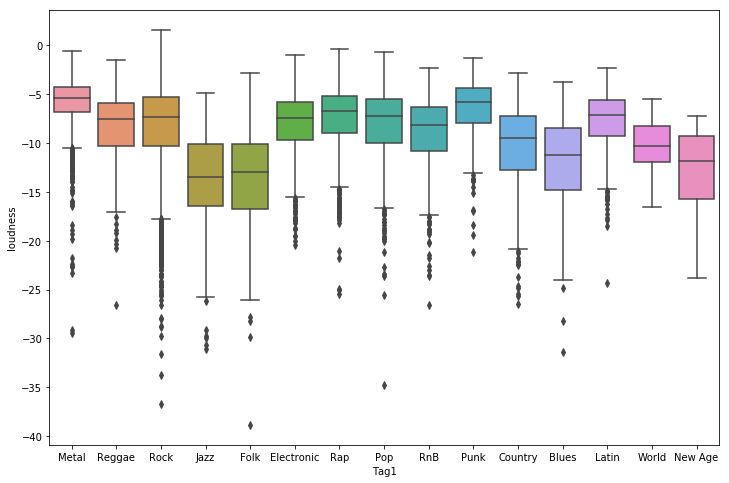

In [58]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='loudness', ax = ax)

#### Duration

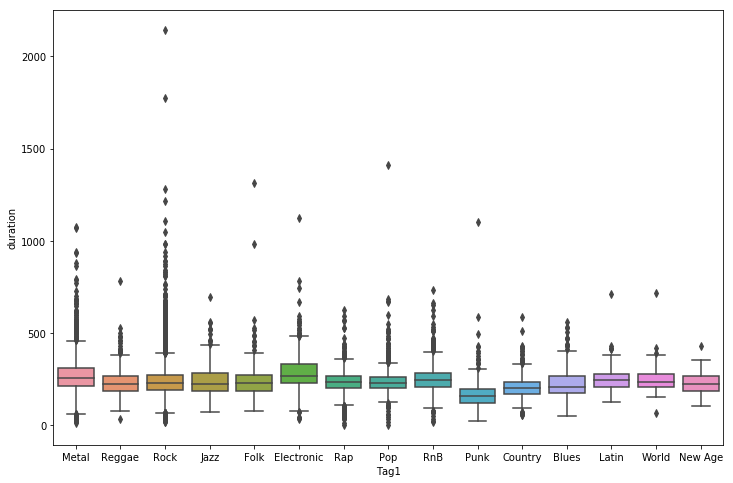

In [59]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='duration', ax = ax)

#### start_of_fade_out

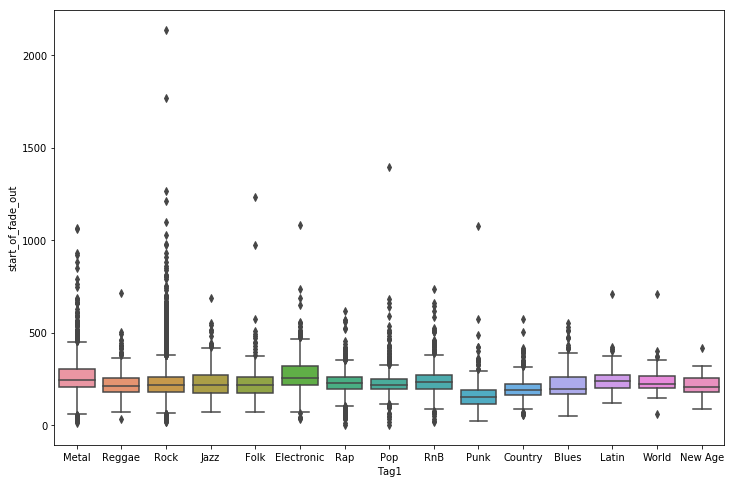

In [60]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='start_of_fade_out', ax = ax)

#### Tempo

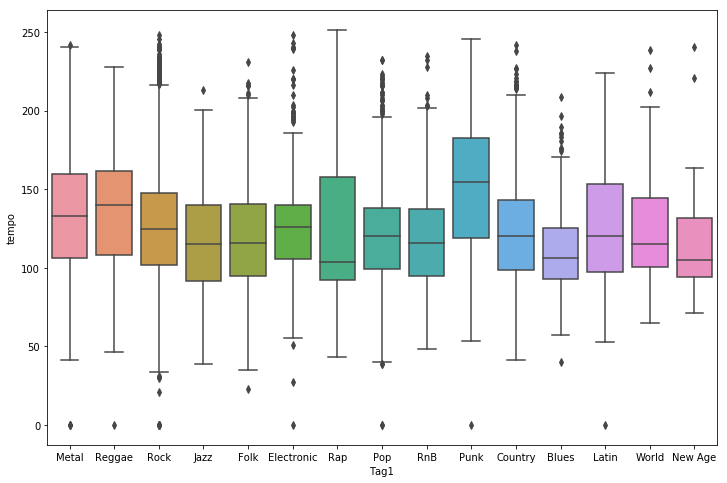

In [61]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='tempo', ax = ax)

### Now to visualize the categoricals

#### Mode

In [62]:
sub = df_m[['mode', 'Tag1']]

In [63]:
tally = pd.crosstab(sub['Tag1'],sub['mode'])
tally = tally.div(tally.sum(axis = 1), axis=0)

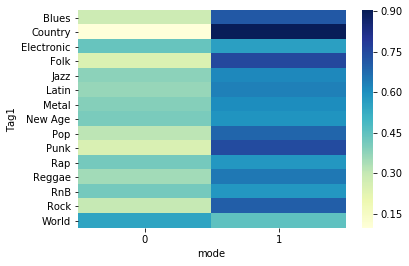

In [64]:
sns.heatmap(tally, cmap="YlGnBu")

#### Time Signature

In [65]:
sub = df_m[['time_signature', 'Tag1']]

In [66]:
tally = pd.crosstab(sub['Tag1'],sub['time_signature'])
tally = tally.iloc[:, 1:]
tally = tally.div(tally.sum(axis = 1), axis=0)

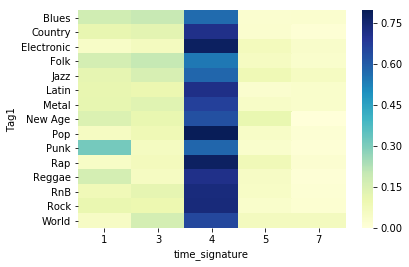

In [67]:
sns.heatmap(tally, cmap="YlGnBu")

In [68]:
#sub['mode'].unique()

#### End of fade in vs. Duration

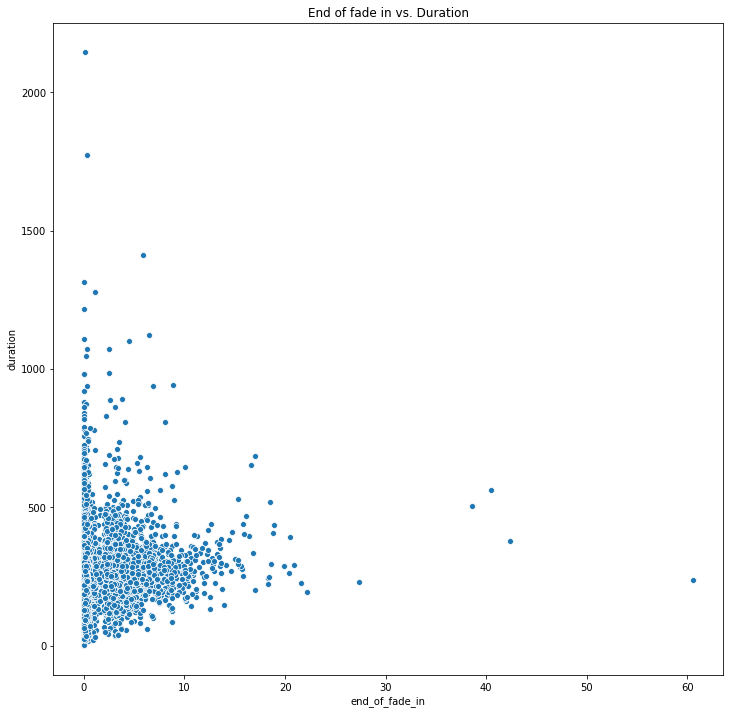

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="end_of_fade_in", y="duration",data=df_m).set_title('End of fade in vs. Duration')

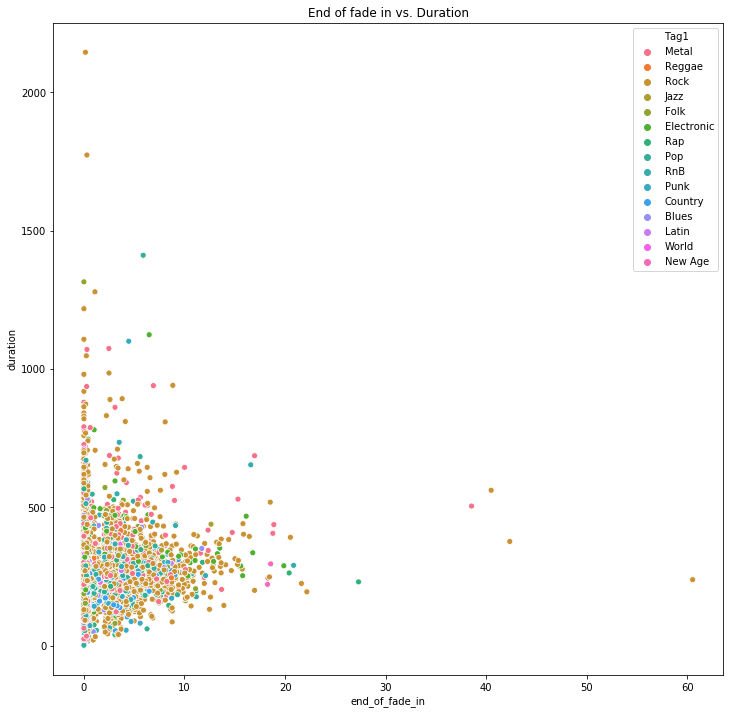

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="end_of_fade_in", y="duration",hue = "Tag1", data=df_m).set_title('End of fade in vs. Duration')

#### Start of fade out vs. Duration

#### Correlation matrix

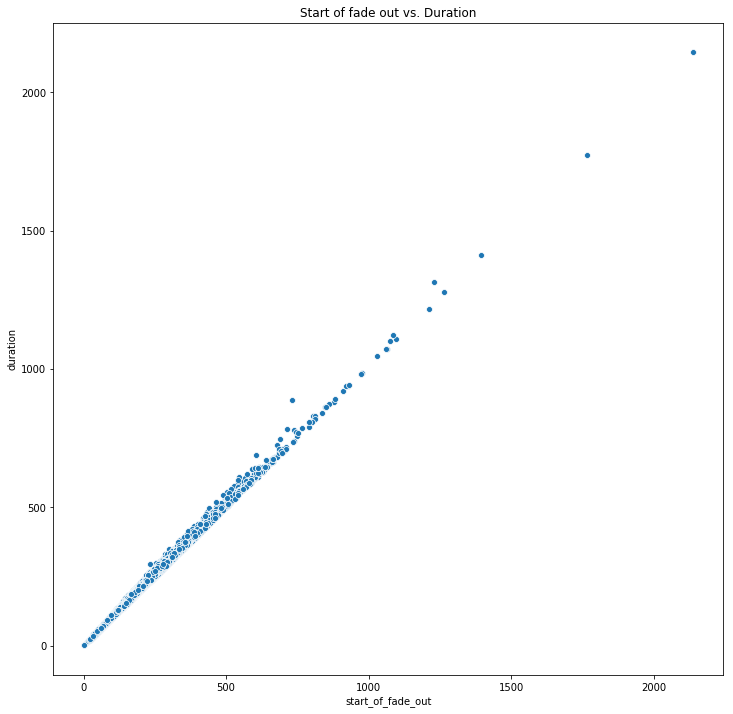

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="start_of_fade_out", y="duration",data=df_m).set_title('Start of fade out vs. Duration')

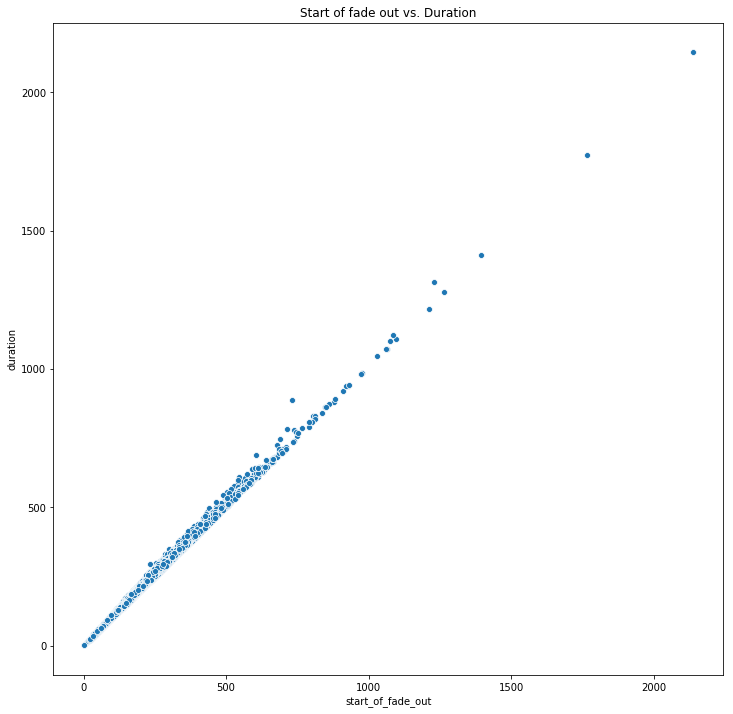

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="start_of_fade_out", y="duration",data=df_m).set_title('Start of fade out vs. Duration')

#### Correlation matrix

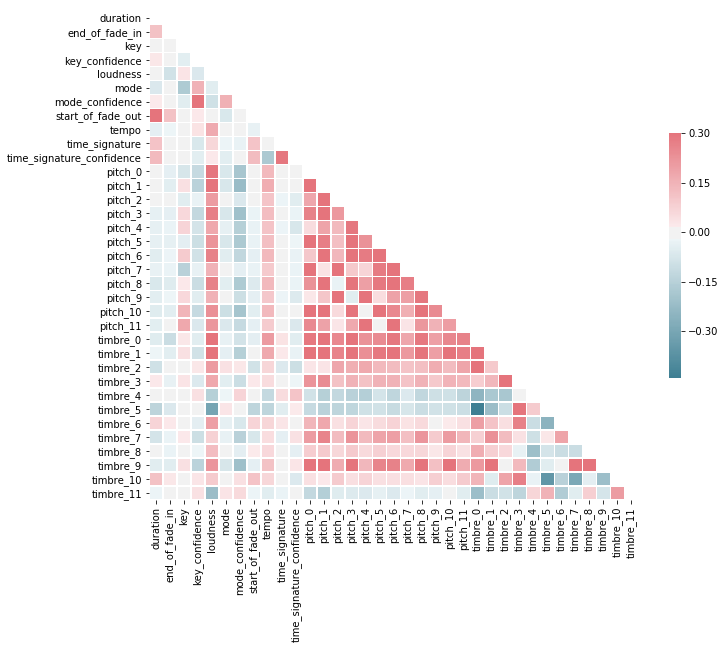

In [73]:
#Numerical values data frame
d= df_m.drop(columns = ["Tag1"])

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

High correlation between Duration and Start of fade out is re-validated here. We can also observe that mode confidence and key confidence are highly correlated. As, are time signature confidence and time signature.